In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load in the data
# heart.csv contains raw data with selected categories.
# heart_full.csv contains all the 13 features with numeric encodings.
heart_df = pd.read_csv('../data/heart_full.csv')

In [8]:
#display top 5 records
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Age**: Patient age in no. of years

**Sex**: Patient Gender ([M]ale, [F]emale)

**ChestPainType**: What type of chest pain reported (**TA**: Typical Angina, **ATA**: Atypical Angina, **NAP**: Non-Anginal Pain, **ASY**: Asymptomatic) 

**RestingBP**: Systolic Patient blood pressure at resting in mm Hg.

**FastingBS**: Fasting blood sugar if present [1: if FastingBS > 120 mg/dl, 0: otherwise] 126+ is diabetic

**RestingECG**: Resting ElectroCardioGram results [Normal, ST: ST-T wave abnormality, LVH: left ventricular hypertrophy]

**MaxHR**: Maximum heart rate

**ExerciseAngina**:Presence of Exercise induced angina

**Oldpeak**: 

**ST_Slope**: Nature of ST slope in the ECG

**ca**: number of major vessels (0-3) colored by fluoroscopy

**thal**: Thallium [normal; fixed defect; reversible defect]

In [11]:
# check for dtypes and null values
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
# data stats
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
from collections import Counter

In [14]:
pred_count = Counter(heart_df['target'])

In [15]:
# Total samples of each class
pred_count

Counter({0: 499, 1: 526})

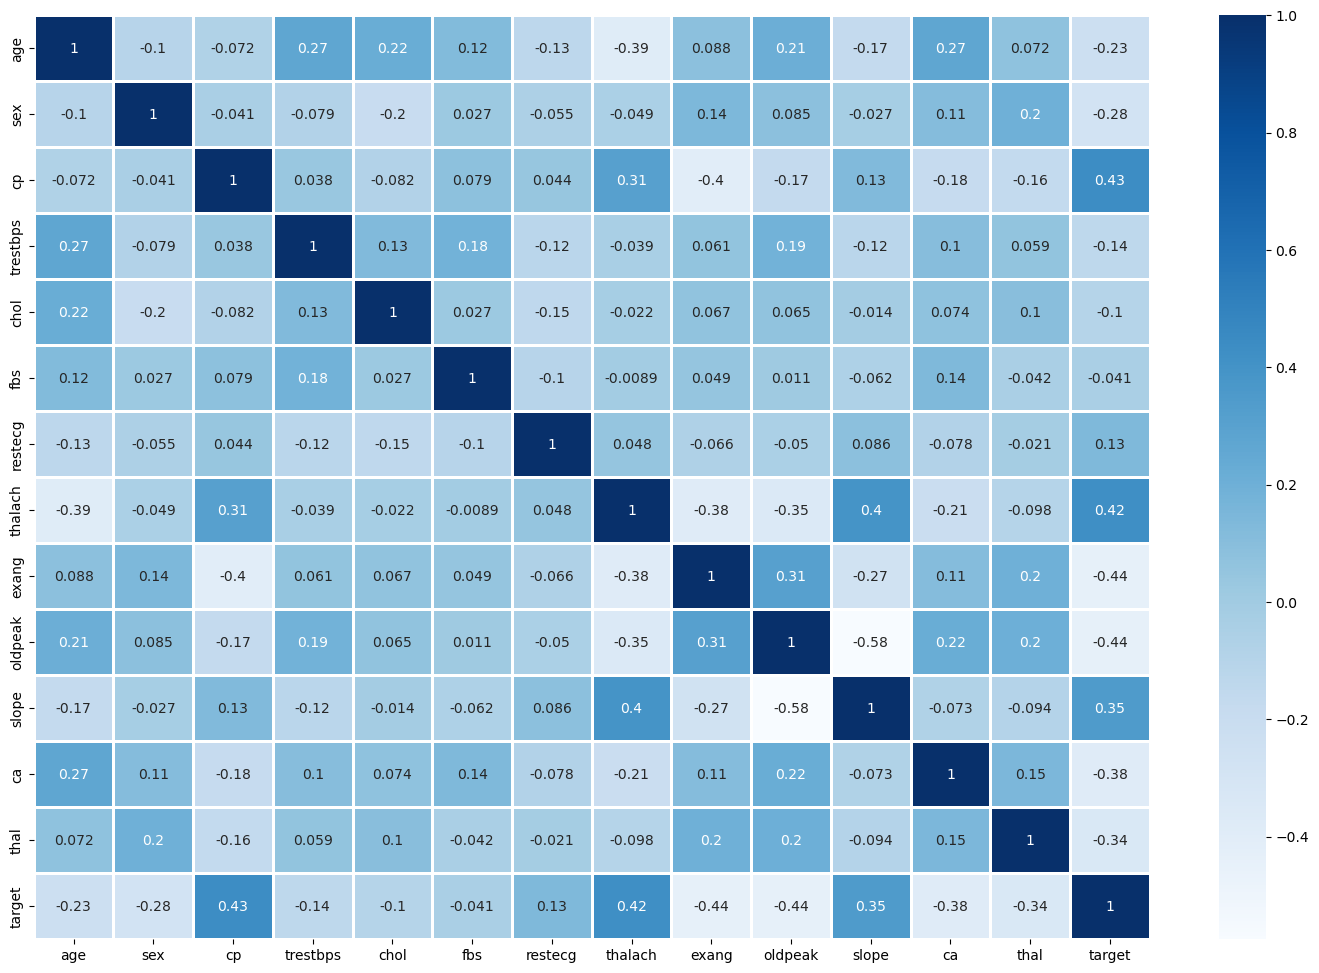

In [19]:
plt.figure(figsize = (18, 12))

corr = heart_df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1, cmap="Blues")
plt.show()

In [20]:
y = heart_df['target']
heart_df.drop(['target'], axis=1, inplace=True)
X = heart_df.copy()

In [21]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [23]:
# Scaling numerical features in the standard range

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(data = scaled_data, columns = X.columns, index = X.index)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [28]:
#minority class oversampling to balance the data

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x = X.copy()
y = y.copy()

x_new , y_new = smote.fit_resample(X,y)
pred_count = Counter(y_new)
print(pred_count)

Counter({0: 526, 1: 526})


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(789, 13) (789,)
(263, 13) (263,)


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
dtc_test_acc = accuracy_score(y_test, y_pred)
print(f"Training accuracy of Decision Tree is : {dtc_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Training accuracy of Decision Tree is : 0.9847908745247148
[[129   4]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       133
           1       0.97      1.00      0.98       130

    accuracy                           0.98       263
   macro avg       0.99      0.98      0.98       263
weighted avg       0.99      0.98      0.98       263



In [30]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(heart_df, y, test_size = 0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
dtc_test_acc = accuracy_score(y_test, y_pred)
print(f"Training accuracy of Decision Tree is : {dtc_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(768, 13) (768,)
(257, 13) (257,)
Training accuracy of Decision Tree is : 1.0
Training accuracy of Decision Tree is : 0.9766536964980544
[[121   0]
 [  6 130]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       121
           1       1.00      0.96      0.98       136

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257

